In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('~/work/data/champagne.csv')

In [3]:
import matplotlib.pyplot as plt

In [7]:
data.columns = data.columns.str.replace(' ','_').str.lower()

In [9]:
data.columns

Index(['date', 'monthly_champagne_sales'], dtype='object')

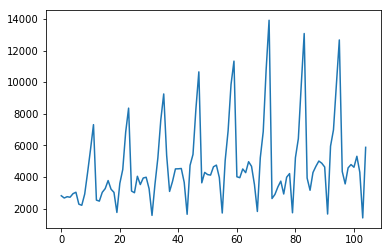

In [12]:
plt.plot(data.monthly_champagne_sales)
plt.show()

In [ ]:
import dateutil
dateutil.relativedelta.relativedelta
import datetime

In [13]:
import numpy as np

In [17]:
np.random.seed(2)
rand = np.random.normal(loc =  400, scale = 50, size = 1000)

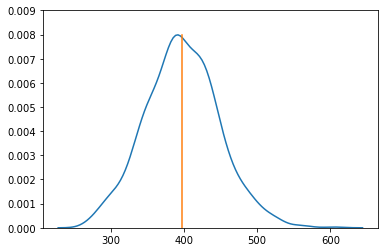

In [25]:
import seaborn as sns
sns.distplot(rand, hist = False)
plt.plot(x = [rand.mean(), rand.mean()],y = [0,0.008,])
plt.ylim(0,0.009)
plt.show()

In [20]:
rand.mean()

397.6075032402411

In [27]:
z = (rand - rand.mean()) /rand.std()

In [28]:
z.mean().round(2)

0.0

In [29]:
z.std().round(2)

1.0

In [34]:
import scipy.stats as stats

### to compute probabilities for a normal distributions

## global average height for men = 171 cms  standard deviation 7 cms 
## what is the probabilty of finding a man with height less than 160 cms ?

In [38]:
stats.norm.cdf(160, loc = 171, scale = 7)*100

5.804156686932752

### prob that a random male will have a height in between 165 cm to 179 cm 

In [41]:
stats.norm.cdf(179,171,7) - stats.norm.cdf(165,171,7)

0.6777680763726663

## what is probabilty that a random male will have a height above 175 cmms ?

In [42]:
1 - stats.norm.cdf(175,171,7)

0.2838545830986763

## What is the min height for a male to make it to the top 10% of the tallest male

In [43]:
stats.norm.ppf(0.90, 171,7)

179.9708609588122

* In an article about the cost of health care, Money magazine reported that a visit to a hospital emergency room for something as simple as a sore throat has a mean cost of USD 328 (Money, January 2009). Assume that the cost for this type of hospital emergency room visit is normally distributed with a standard deviation of USD 92. Answer the following questions about the cost of a hospital emergency room visit for this medical service.
    - What is the probability that the cost will be more than USD 500?
    - What is the probability that the cost will be less than USD 250?
    - What is the probability that the cost will be between USD 300 and USD 400?
    - If the cost to a patient is in the lower 8% of charges for this medical service, what was the cost of this patient’s emergency room visit?


## more than 500 --> 500 to + inf --> right side

In [45]:
round((1 - stats.norm.cdf(500, 328,92))*100,3)

3.077

## less than 250 --> - inf to 250 --> left side

In [46]:
round((stats.norm.cdf(250, 328,92))*100,3)

19.827

## Between 300 and 400

In [47]:
round((stats.norm.cdf(400, 328,92) -  stats.norm.cdf(300, 328,92))*100,3)

40.264

## lower 8 %

In [48]:
stats.norm.ppf(8/100, 328,92)

198.7334164515138

# Sampling Distribution

- Barron’s reported that the average number of weeks an individual is unemployed is 17.5 weeks (Barron’s, February 18, 2008). Assume that for the population of all unemployed individuals the population mean length of unemployment is 17.5 weeks and that the population standard deviation is 4 weeks. Suppose you would like to select a random sample of 50 unemployed individuals for a follow-up study.
    * What is the probability that a simple random sample of 50 unemployed individuals will provide a sample mean within 1 week of the population mean?
    * What is the probability that a simple random sample of 50 unemployed individuals will provide a sample mean within 1/2 week of the population mean?


#### pop mean +- 1

In [53]:
from math import sqrt

In [54]:
mu = 17.5
sigma = 4
n = 50
xbar1 = mu + 1
xbar2 = mu - 1

In [56]:
stats.norm.cdf(xbar1 , loc = 17.5 , scale = sigma/sqrt(n)) - stats.norm.cdf(xbar2 , loc = 17.5 , scale = sigma/sqrt(n))

0.9229001282564584

## Confidence Interval 

## 95 % confidence 

In [57]:
stats.norm.ppf(0.025) #( - z or z1)

-1.9599639845400545

In [58]:
stats.norm.ppf(0.95 + 0.025) # (+ z or z2)

1.959963984540054

- The Wall Street Journal reported that automobile crashes cost the United States USD 162 billion annually (TheWall Street Journal, March 5, 2008). The average cost per person for crashes in the Tampa, Florida, area was reported to be USD 1599. Suppose this average cost was based on a sample of 50 persons who had been involved in car crashes and that the population standard deviation is σ = USD 600. What is the margin of error for a 95% confidence interval? What would you recommend if the study required a margin of error of USD 150 or less?

In [71]:
xbar = 1599
sigma = 600
n = 50
c= 0.95
alpha = 1 -0.95
z = stats.norm.ppf(alpha/2)

mu1 = xbar + (z * sigma/sqrt(n))
mu2 = xbar - (z * sigma/sqrt(n))

In [72]:
mu1,mu2

(1432.6915410780387, 1765.3084589219613)

In [73]:
stats.norm.interval(0.95,loc =  xbar, scale = sigma/sqrt(n))


(1432.6915410780387, 1765.3084589219613)

## t distribution

## 2.	Nielsen Media Research conducted a study of household television viewing times during the 8 p.m. to 11 p.m. time period. The data contained in the file named Nielsen are consistent with the findings reported (The World Almanac, 2003). Based upon past studies the population standard deviation is assumed known with σ _ 3.5 hours. Develop a 95% confidence interval estimate of the mean television viewing time per week during the 8 p.m. to 11 p.m. time period.

In [74]:
nielsen = pd.read_csv('~/work/data/Nielsen.CSV')

In [75]:
xbar = nielsen.Hours.mean()
n = nielsen.Hours.size
sigma = 3.5
stats.norm.interval(0.95,loc =  xbar, scale = sigma/sqrt(n))

(8.10394499307334, 8.89605500692666)

# suppose sigma is not given 

In [81]:
xbar = nielsen.Hours.mean()
n = nielsen.Hours.size
s = nielsen.Hours.std()
c = 0.95
alpha = 1-c
t = stats.t.ppf(alpha/2 , n-1)
mu1 = xbar + (t * s/sqrt(n))
mu2 = xbar - (t * s/sqrt(n))
mu1, mu2

(8.108007871809667, 8.891992128190333)

In [83]:
stats.t.interval(0.95,df = n-1,loc =  xbar, scale = s/sqrt(n))

(8.108007871809667, 8.891992128190333)

# z test

- H0 : mu >= 2000
- Ha : mu < 2000

In [84]:
xbar = 1999.6
mu0 =  2000
sigma = 1.3
n = 40
z = (xbar - mu0 )/ (sigma/sqrt(n))
stats.norm.cdf(z)

0.025826347487875892

In [85]:
pvalue = stats.norm.cdf(z)
alpha = 0.05

In [86]:
if pvalue < alpha :
    print('reject')
else :
    print('do not reject')

reject


2.	In a study entitled How Undergraduate Students Use Credit Cards, it was reported that undergraduate students have a mean credit card balance of 3173 USD (Sallie Mae, April 2009).  This figure was an all-time high and had increased 44% over the previous five years. Assume that a current study is being conducted to determine if it can be concluded that the mean credit card balance for undergraduate students has continued to increase compared to the April 2009 report. Based on previous studies, use a population standard deviation σ = 1000 USD.
    - 	State the null and alternative hypotheses.
    - 	What is the p-value for a sample of 180 undergraduate students with a sample mean credit card balance of 3325 USD?
    - 	Using a .05 level of significance, what is your conclusion?


In [88]:
H0 : mu <= 3173
Ha : mu > 3173

In [90]:
xbar = 3325
mu0 = 3173
sigma = 1000 
n = 180
z = (xbar - mu0 )/ (sigma/sqrt(n))
pvalue = 1 - stats.norm.cdf(z)
pvalue

0.02071034728127641

In [92]:
if pvalue < alpha :print('reject')
else : print('do not reject')

reject


* Wall Street securities firms paid out record year-end bonuses of 125K USD per employee for 2005 (Fortune, February 6, 2006). Suppose we would like to take a sample of employees at the Jones & Ryan securities firm to see whether the mean year-end bonus is different from the reported mean of 125K USD for the population.
    - State the null and alternative hypotheses you would use to test whether the year-end bonuses paid by Jones & Ryan were different from the population mean.
    - Suppose a sample of 40 Jones & Ryan employees showed a sample mean year-end bonus of 118K USD. Assume a population standard deviation of  30K USD and compute the p-value.
    - With α = .05 as the level of significance, what is your conclusion?

In [94]:
H0 : mu == 125
Ha : mu != 125

In [95]:
xbar = 118
mu0 = 125
sigma = 30 
n = 40
z = (xbar - mu0 )/ (sigma/sqrt(n))
z

-1.4757295747452437

##### p value of left tail test

In [98]:
pvalue = stats.norm.cdf(z) *2
pvalue

0.140016503197169

In [99]:
if pvalue < alpha :print('reject')
else : print('do not reject')

do not reject
